In [3]:
import cv2
import numpy as np
import os
import csv
from operator import itemgetter
from itertools import groupby
from scipy.spatial import distance

def euclidean_distance(image1, image2):
    return distance.euclidean(image1, image2)

def calculate_similarity(img_dir, cache_path):
    hash_dict = {}
    for file in os.listdir(img_dir):
        file_path = os.path.join(img_dir, file)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        # Compute hash (you can use other methods than PHASH)
        image_hash = cv2.img_hash.pHash(image).flatten()
        hash_dict[file] = image_hash

    with open(cache_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for key, val in hash_dict.items():
            writer.writerow([key, *val])

    return hash_dict

def select_most_similar(hash_dict, n):
    distances = {}
    filenames = list(hash_dict.keys())
    for i in range(len(filenames)):
        for j in range(i+1, len(filenames)):
            distance = euclidean_distance(hash_dict[filenames[i]], hash_dict[filenames[j]])
            distances[(filenames[i], filenames[j])] = distance

    # Sort the pairs by distance
    sorted_pairs = sorted(distances.items(), key=itemgetter(1))
    
    # Group pairs with the same distance
    grouped_pairs = groupby(sorted_pairs, key=itemgetter(1))

    selected_files = []
    for _, group in grouped_pairs:
        group = list(group)
        if len(selected_files) + len(group) > n:
            break
        for pair in group:
            selected_files.extend(pair[0])
    
    return selected_files[:n]

datapath = "C:/jupyter/capston/bald/data/sebum"
categories = ['normal', 'mild', 'moderate', 'severe']
cache_path = ['euclidean_normal.csv', 'euclidean_mild.csv', 'euclidean_moderate.csv', 'euclidean_severe.csv']
n = 686

def main():
    for i in range(4): 
        file = datapath + "/" + categories[i]
        print(categories[i] + " 실행")
        hash_dict = calculate_similarity(file, cache_path[i])
        selected_files = select_most_similar(hash_dict, n)
        
        print("파일명: " + cache_path[i])
        file_path = './' + cache_path[i]
        file_size_gb = get_file_size(file_path)
        print(f"파일 용량: {file_size_gb:.2f} GB")

        print(selected_files)
        
# 파일 용량 GB 단위 출력
def get_file_size(file_path):
    size_in_bytes = os.path.getsize(file_path)
    size_in_gb = size_in_bytes / (1024 * 1024 * 1024)  # 바이트를 GB로 변환
    return size_in_gb

# 메인 프로그램 실행
# main() 함수를 실행하고 그 안에 있는 glob_files()함수를 통해 양호 경증 중증도 중증 순으로 함수를 다시 호출한다
# glob_files()함수를 통해 x, y배열에 데이터를 다 집어넣고
# np.savez를 통해 .npz형식의 데이터 배열 파일을 저장하게 된다.
if __name__ == '__main__':
    main()

normal 실행
파일명: euclidean_normal.csv
파일 용량: 0.00 GB
['1195_A2LEBJJDE00197M_1606803447139_4_LH.jpg', '6570_A2LEBJJDE001675_1607847988313_5_RH.jpg', '0643_A2LEBJJDE00048F_1606720385611_3_TH.jpg', '1221_A1LCAIHDH00009X_1611378522764_6_BH.jpg', '4133_A1LCAIHDH000035_1608775046238_6_BH.jpg', '5214_A2LEBJJDE001399_1603871252529_4_LH.jpg', '5644_A2LEBJJDE00198F_1604814752483_5_RH.jpg', '6570_A2LEBJJDE001675_1607790667818_6_BH.jpg', '2996_A2LEBJJDE00083Q_1606270468506_5_RH.jpg', '3365_A2LEBJJDE00106D_1609753055935_3_TH.jpg', '1940_A2LEBJJDE000307_1602650631395_2_TH.jpg', '4307_A2LEBJJDE000683_1602753178367_2_TH.jpg', '2585_A2LEBJJDE001302_1603682121560_4_LH.jpg', '4267_A1LCAIHDH00016D_1610251871373_5_RH.jpg', '1069_A2LEBJJDE00094D_1610702091212_2_TH.jpg', '4659_A2LEBJJDE001349_1604824284398_4_LH.jpg', '2688_A2LEBJJDE00115E_1604799604193_3_TH.jpg', '4970_A1LCAIHDH00010K_1611748273443_2_TH.jpg', '2585_A2LEBJJDE001302_1602816181618_3_TH.jpg', '4659_A2LEBJJDE001349_1604740872091_3_TH.jpg', '1534_A2

파일명: euclidean_mild.csv
파일 용량: 0.00 GB
['6440_A2LEBJJDE001352_1603166172989_6_BH.jpg', '8337_A2LEBJJDE00109R_1604735137267_3_TH.jpg', '5750_A2LEBJJDE000589_1603539091067_5_RH.jpg', '9296_A2LEBJJDE00073W_1602469840361_4_LH.jpg', '2013_A2LEBJJDE00141O_1603439623592_2_TH.jpg', '9817_A2LEBJJDE00193F_1603877717610_5_RH.jpg', '1195_A2LEBJJDE00197M_1604041457623_5_RH.jpg', '3588_A2LEBJJDE00108Y_1603499455196_6_BH.jpg', '3588_A2LEBJJDE00108Y_1602902451882_4_LH.jpg', '5415_A2LEBJJDE00032S_1602833122267_4_LH.jpg', '1798_A2LEBJJDE000539_1602586327738_2_TH.jpg', '3937_A2LEBJJDE00046T_1603775793535_3_TH.jpg', '1459_A2LEBJJDE00025D_1603263926769_2_TH.jpg', '5870_A2LEBJJDE00065O_1603950155901_5_RH.jpg', '1195_A2LEBJJDE00117Z_1603340803792_4_LH.jpg', '9527_A2LEBJJDE00110E_1602639009371_4_LH.jpg', '1459_A2LEBJJDE00025D_1603011026008_4_LH.jpg', '3858_A2LEBJJDE00076B_1602640703296_6_BH.jpg', '3937_A2LEBJJDE00046T_1603776307779_4_LH.jpg', '6440_A2LEBJJDE001352_1602893611739_3_TH.jpg', '2013_A2LEBJJDE00141

파일명: euclidean_moderate.csv
파일 용량: 0.00 GB
['2404_A2LEBJJDE00020D_1602904994995_6_BH.jpg', '6766_A2LEBJJDE00114L_1603364489675_3_TH.jpg', '2585_A2LEBJJDE001302_1602833549493_3_TH.jpg', '3046_A2LEBJJDE00089J_1602728822370_4_LH.jpg', '5569_A2LEBJJDE001211_1605494868760_5_RH.jpg', '6981_A2LEBJJDE00075I_1602664418716_6_BH.jpg', '4919_A2LEBJJDE00064V_1605951888783_3_TH.jpg', '7366_A2LEBJJDE00088Q_1604724069979_6_BH.jpg', '5750_A2LEBJJDE000589_1602840215587_4_LH.jpg', '7988_A2LEBJJDE000357_1603414272915_6_BH.jpg', '2522_A2LEBJJDE00014Q_1605323616715_2_TH.jpg', '8100_A2LEBJJDE00010J_1603349009729_4_LH.jpg', '6078_A2LEBJJDE00093K_1603510390472_6_BH.jpg', '9296_A2LEBJJDE00073W_1604904511783_5_RH.jpg', '3339_A2LEBJJDE00057G_1605782797788_5_RH.jpg', '3339_A2LEBJJDE00057G_1605953019217_4_LH.jpg', '7126_A2LEBJJDE001534_1605949805827_5_RH.jpg', '8224_A2LEBJJDE000448_1604114802578_2_TH.jpg', '6440_A2LEBJJDE001352_1605406211916_3_TH.jpg', '8802_A2LEBJJDE00178R_1604990166520_5_RH.jpg', '2404_A2LEBJJDE0

파일명: euclidean_severe.csv
파일 용량: 0.00 GB
['2800_A2LEBJJDE00036Z_1604626888639_6_BH.jpg', '9817_A2LEBJJDE00193F_1605153347945_5_RH.jpg', '5750_A2LEBJJDE000589_1603789253622_3_TH.jpg', '8281_A2LEBJJDE00055U_1605923909340_2_TH.jpg', '3339_A2LEBJJDE00057G_1603699003505_5_RH.jpg', '4659_A2LEBJJDE001349_1604811000787_4_LH.jpg', '8262_A2LEBJJDE00047M_1604289972326_5_RH.jpg', '9447_A2LEBJJDE001951_1604581042594_3_TH.jpg', '2959_A2LEBJJDE00097R_1603077252695_6_BH.jpg', '5030_A2LEBJJDE00186Z_1604312191226_6_BH.jpg', '2585_A2LEBJJDE001302_1606535128996_2_TH.jpg', '2959_A2LEBJJDE00097R_1604119563095_2_TH.jpg', '2326_A2LEBJJDE00056N_1602983335338_4_LH.jpg', '3588_A2LEBJJDE00108Y_1604921081586_5_RH.jpg', '3046_A2LEBJJDE00089J_1605848722734_2_TH.jpg', '7366_A2LEBJJDE00088Q_1605750299862_5_RH.jpg', '5237_A2LEBJJDE00029K_1603444515908_4_LH.jpg', '9578_A2LEBJJDE00105K_1604207946169_4_LH.jpg', '2013_A2LEBJJDE00141O_1604298166898_4_LH.jpg', '2820_A2LEBJJDE00179K_1604886816769_6_BH.jpg', '2762_A2LEBJJDE000

In [1]:
import cv2
import numpy as np
import os
import csv
import shutil
from sklearn.cluster import KMeans
from scipy.spatial import distance

def euclidean_distance(image1, image2):
    return distance.euclidean(image1, image2)

def calculate_similarity(img_dir, cache_path):
    hash_dict = {}
    for file in os.listdir(img_dir):
        file_path = os.path.join(img_dir, file)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        # Compute hash (you can use other methods than PHASH)
        image_hash = cv2.img_hash.pHash(image).flatten()
        hash_dict[file] = image_hash

    with open(cache_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for key, val in hash_dict.items():
            writer.writerow([key, *val])

    return hash_dict

def load_hashes(cache_path):
    hash_dict = {}
    with open(cache_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            filename = row[0]
            image_hash = np.array(list(map(int, row[1:])))
            hash_dict[filename] = image_hash
    return hash_dict

def select_most_similar(hash_dict, n):
    # Get the list of hash values
    hashes = list(hash_dict.values())

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n, random_state=0).fit(hashes)

    # Find the index of the closest point to each cluster center
    closest_points = [np.argmin(distance.cdist([center], hashes, 'euclidean')) for center in kmeans.cluster_centers_]

    # Get the filenames of the closest images
    closest_images = [list(hash_dict.keys())[index] for index in closest_points]

    return closest_images

datapath = "C:/jupyter/capston/bald/data/sebum"
categories = ['combineNormal', 'mild', 'moderate', 'severe']
cache_path = ['euclidean_normal4.csv', 'euclidean_mild4.csv', 'euclidean_moderate4.csv', 'euclidean_severe4.csv']
n = 686

selected_images_dir = ['uclid_normal', 'uclid_mild', 'uclid_moderate', 'uclid_severe']

def main():
    for i in range(4): 
        file = datapath + "/" + categories[i]
        print("경로: " + file)
        print(categories[i] + " 실행")
        hash_dict = calculate_similarity(file, cache_path[i])
        selected_files = select_most_similar(hash_dict, n)
        
        print("파일명: " + cache_path[i])
        file_path = './' + cache_path[i]
        file_size_gb = get_file_size(file_path)
        print(f"파일 용량: {file_size_gb:.2f} GB")
        
        print(selected_files)
        for filename in selected_files:
            src_path = os.path.join(file, filename)
            
            combine_selected_images_dir = datapath + "/" + selected_images_dir[i]
            if not os.path.exists(combine_selected_images_dir): # 해당 위치에 경로(폴더)가 없으면
                os.mkdir(combine_selected_images_dir) # 변수명 combine_selected_images_dir로 폴더 생성
            dst_path = os.path.join(combine_selected_images_dir, filename)
            
            shutil.copy(src_path, dst_path)
            
# 파일 용량 GB 단위 출력
def get_file_size(file_path):
    size_in_bytes = os.path.getsize(file_path)
    size_in_gb = size_in_bytes / (1024 * 1024 * 1024)  # 바이트를 GB로 변환
    return size_in_gb

# 메인 프로그램 실행
# main() 함수를 실행하고 그 안에 있는 glob_files()함수를 통해 양호 경증 중증도 중증 순으로 함수를 다시 호출한다
# glob_files()함수를 통해 x, y배열에 데이터를 다 집어넣고
# np.savez를 통해 .npz형식의 데이터 배열 파일을 저장하게 된다.
if __name__ == '__main__':
    main()

경로: C:/jupyter/capston/bald/data/sebum/combineNormal
combineNormal 실행
파일명: euclidean_normal4.csv
파일 용량: 0.00 GB
['9414_A2LEBJJDE00033L_1608259387552_2_TH.jpg', '7988_A2LEBJJDE000357_1605334609019_3_TH.jpg', '2688_A2LEBJJDE00115E_1606444815938_6_BH.jpg', '8100_A2LEBJJDE00010J_1602998383448_4_LH.jpg', '1080_A2LEBJJDE00092R_1603792907075_2_TH.jpg', '1963_A2LCBJCAC00003V_1608768550021_6_BH.jpg', '1069_A2LEBJJDE00094D_1610265240471_5_RH.jpg', '5750_A2LEBJJDE000589_1603539101435_2_TH.jpg', '6995_A2LEBJJDE00104R_1602829315024_2_TH.jpg', '4263_A2LEBJJDE00062A_1606623899042_2_TH.jpg', '0643_A2LEBJJDE00048F_1604379695877_4_LH.jpg', '8802_A2LEBJJDE00174K_1608703113519_4_LH.jpg', '5644_A2LEBJJDE00198F_1605600386731_3_TH.jpg', '6437_A1LCAIHDH00019R_1609995381583_4_LH.jpg', '5939_A2LEBJJDE00129F_1602985813994_2_TH.jpg', '2602_A1LCAIHDH00013Y_1609580847910_3_TH.jpg', '6570_A2LEBJJDE001675_1607830657797_4_LH.jpg', '2469_A2LEBJJDE00019Q_1603796128937_6_BH.jpg', '0733_A2LEBJJDE000084_1602728289013_2_TH.

경로: C:/jupyter/capston/bald/data/sebum/mild
mild 실행
파일명: euclidean_mild4.csv
파일 용량: 0.00 GB
['3332_A2LEBJJDE00100K_1605327802390_3_TH.jpg', '8212_A2LEBJJDE00070I_1605936336253_5_RH.jpg', '8999_A2LEBJJDE00001I_1602568699569_3_TH.jpg', '5237_A2LEBJJDE00029K_1603879869314_3_TH.jpg', '0013_A2LEBJJDE00060O_1603341963457_6_BH.jpg', '6766_A2LEBJJDE00114L_1603957687092_2_TH.jpg', '7584_A2LEBJJDE00189E_1604414103044_5_RH.jpg', '8224_A2LEBJJDE000448_1606192512387_6_BH.jpg', '9414_A2LEBJJDE00033L_1604823621904_5_RH.jpg', '5849_A2LEBJJDE00015J_1603353779240_5_RH.jpg', '2013_A2LEBJJDE00141O_1604120144915_4_LH.jpg', '9296_A2LEBJJDE00073W_1604130470420_4_LH.jpg', '0556_A2LEBJJDE00041T_1604055292288_6_BH.jpg', '8833_A2LEBJJDE00156I_1605070289955_6_BH.jpg', '0844_A2LEBJJDE00067A_1604107455676_6_BH.jpg', '5750_A2LEBJJDE000589_1603538951102_2_TH.jpg', '5939_A2LEBJJDE00129F_1603265979538_4_LH.jpg', '2487_A2LEBJJDE00050U_1603965565859_5_RH.jpg', '0131_A2LEBJJDE00166C_1604899738956_6_BH.jpg', '0733_A2LEBJJD

경로: C:/jupyter/capston/bald/data/sebum/moderate
moderate 실행
파일명: euclidean_moderate4.csv
파일 용량: 0.00 GB
['1195_A2LEBJJDE00197M_1603868867406_6_BH.jpg', '2522_A2LEBJJDE00014Q_1604651759132_4_LH.jpg', '4015_A2LEBJJDE00151I_1605672842752_5_RH.jpg', '6121_A2LEBJJDE00183L_1605620776477_3_TH.jpg', '2326_A2LEBJJDE001026_1603159587691_3_TH.jpg', '0733_A2LEBJJDE000084_1602737956329_4_LH.jpg', '3065_A2LEBJJDE00103Y_1603784932420_5_RH.jpg', '3339_A2LEBJJDE00057G_1605509553838_6_BH.jpg', '4002_A2LEBJJDE00137N_1602769559212_3_TH.jpg', '7027_A2LEBJJDE001117_1605245798095_5_RH.jpg', '9447_A2LEBJJDE001951_1605354963913_5_RH.jpg', '8100_A2LEBJJDE00010J_1602574439675_2_TH.jpg', '4717_A2LEBJJDE001208_1605779980908_3_TH.jpg', '2800_A2LEBJJDE00036Z_1605836003374_2_TH.jpg', '2688_A2LEBJJDE00115E_1603779062207_3_TH.jpg', '4919_A2LEBJJDE00064V_1605856452753_3_TH.jpg', '9447_A2LEBJJDE001951_1604051303335_3_TH.jpg', '9578_A2LEBJJDE00105K_1605434008828_5_RH.jpg', '7988_A2LEBJJDE000357_1604994733775_5_RH.jpg', '9

경로: C:/jupyter/capston/bald/data/sebum/severe
severe 실행
파일명: euclidean_severe4.csv
파일 용량: 0.00 GB
['2326_A2LEBJJDE001026_1602987232946_2_TH.jpg', '2479_A2LEBJJDE00147H_1603329131961_3_TH.jpg', '9578_A2LEBJJDE00105K_1605764159785_3_TH.jpg', '2013_A2LEBJJDE00141O_1603270465862_4_LH.jpg', '7168_A2LEBJJDE00124F_1603953628099_2_TH.jpg', '2637_A2LEBJJDE00099D_1602925507570_5_RH.jpg', '4717_A2LEBJJDE001208_1602816377478_6_BH.jpg', '3832_A2LEBJJDE00140V_1602914363499_2_TH.jpg', '7229_A2LEBJJDE00142H_1604722556065_4_LH.jpg', '2469_A2LEBJJDE00019Q_1606268686347_2_TH.jpg', '6078_A2LEBJJDE00160J_1606098393934_6_BH.jpg', '2762_A2LEBJJDE000498_1604636048110_3_TH.jpg', '1983_A2LEBJJDE00188L_1606102053591_2_TH.jpg', '6995_A2LEBJJDE00104R_1604110473568_4_LH.jpg', '2762_A2LEBJJDE00169Q_1605139990658_4_LH.jpg', '4002_A2LEBJJDE00137N_1606293154651_2_TH.jpg', '9527_A2LEBJJDE00110E_1605056990975_5_RH.jpg', '1237_A2LEBJJDE001584_1606113840454_3_TH.jpg', '8781_A2LEBJJDE000906_1605673982445_3_TH.jpg', '1743_A2

In [13]:
# select_most_similar()를 통해 이미지간 유사한 이미지명을 출력하고 이들을 uclid 폴더 경로명에 저장한다.
# 상단 코드랑 합쳐놔서 실행시켜놓음.
# import shutil

# selected_images_dir = "./myData/uclid_severe"

#for filename in selected_files:
#    src_path = os.path.join(img_dir, filename)
#    dst_path = os.path.join(selected_images_dir, filename)
#    shutil.copy(src_path, dst_path)

In [14]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17102472295114241774
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1728525108
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11050403737880896185
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


# **1. 이미지 증식 및 npz 파일 생성**

In [2]:
import os, glob, random
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## ImageDataGenerator를 활용하여 각 레이블당 이미지를 3배로 증식한 후, npz 파일 생성

datapath = "C:/jupyter/capston/bald/data/sebum" # 훈련 데이터 경로
output = "euclid_sebum.npz"  # 저장할 파일 이름
x = []                    # Image
y = []                    # Label

datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = 'nearest',
    brightness_range = [0.7, 1.3]
)


# 폴더에 있는 이미지 데이터 읽기
# path를 통해 경로를 설정해주고, label을 통해 해당 이미지에 대한 라벨값을 지정해준다
# 예를 들어 양호 카테고리 이미지들은 0을 받아 지정해준다.
def glob_files(path, label):
    files = glob.glob(path + "/*.jpg")
    random.shuffle(files)
    
    # 이미지 데이터 처리
    # 함수를 호출할 때마다 반복을 통해 데이터를 x,y 배열에 계속 집어넣는다.
    num = 0
    max_photo = 686  # normal, mild, moderate, severe 중 가장 작은 이미지 개수로 설정
    for i, f in enumerate(files):
         # max_photo 값보다 커질 경우, 루프 벗어남.
        if num >= max_photo:   
            break
        num += 1
        
        # 이미지 데이터 읽기
        img = Image.open(f)
        img = img.resize((192,192))  # 이미지 사이즈 256 * 256 설정
        img = img.convert("RGB")
        img = np.asarray(img)        # RGB 색상값 0부터 1까지의 실수값 변환
        
        # 원본 이미지 저장
        x.append(img)
        y.append(label)
        
        # 이미지 증식
        # batch_size=1 -> 전체 이미지를 변형시킬 것이다.
        #img = img.reshape((1,) + img.shape)
        #for _ in range(2):
        #    for batch in datagen.flow(img, batch_size=1):
        #        augment_img = batch[0]
        #        x.append(augment_img)
        #        y.append(label)
        #        break

        if i % 100 == 0:
            print("run: " + f)

# 바꾼 코드 !!
# 폴더에 있는 이미지 데이터 읽고 레이블 지정
# 반복문을 통해 양호, 경증, 중등도, 중증 이미지를 가져온다.
# 또한 glob_files 함수를 호출할 때 각각의 라벨을 지정한다.
# i = 0 -> 양호, ... i = 3 -> 중증
# categories1: Training 데이터 이미지들 가져오기
# categories2: Validation 데이터 이미지들 가져오기
categories1 = ['uclid_normal', 'uclid_mild', 'uclid_moderate', 'uclid_severe']
def main():
    for i in range(4): 
        file = datapath + "/" + categories1[i]
        print(categories1[i] + " 실행")
        glob_files(file, i) # 534: Training 데이터의 normal 이미지 개수
        
    # 파일로 저장
    np.savez(output, x=x, y=y) # Numpy 압축파일로 저장
    print(str(len(x)) + "개의 이미지를 저장했습니다.")
    print("파일명: " + output)
    file_path = './euclid_sebum.npz'
    file_size_gb = get_file_size(file_path)
    print(f"파일 용량: {file_size_gb:.2f} GB")  

# 파일 용량 GB 단위 출력
def get_file_size(file_path):
    size_in_bytes = os.path.getsize(file_path)
    size_in_gb = size_in_bytes / (1024 * 1024 * 1024)  # 바이트를 GB로 변환
    return size_in_gb
    
# 메인 프로그램 실행
# main() 함수를 실행하고 그 안에 있는 glob_files()함수를 통해 양호 경증 중증도 중증 순으로 함수를 다시 호출한다
# glob_files()함수를 통해 x, y배열에 데이터를 다 집어넣고
# np.savez를 통해 .npz형식의 데이터 배열 파일을 저장하게 된다.
if __name__ == '__main__':
    main()

uclid_normal 실행
run: C:/jupyter/capston/bald/data/sebum/uclid_normal\1407_A2LEBJJDE001258_1604305977719_4_LH.jpg
run: C:/jupyter/capston/bald/data/sebum/uclid_normal\8781_A2LEBJJDE000906_541532635_2_TH.jpg
run: C:/jupyter/capston/bald/data/sebum/uclid_normal\9414_A2LEBJJDE00033L_1608259387552_2_TH.jpg
run: C:/jupyter/capston/bald/data/sebum/uclid_normal\4267_A1LCAIHDH00016D_1609907371386_3_TH.jpg
run: C:/jupyter/capston/bald/data/sebum/uclid_normal\3006_A1LCAIHDH00007C_1607735702909_4_LH.jpg
run: C:/jupyter/capston/bald/data/sebum/uclid_normal\1069_A2LEBJJDE00094D_1607308325445_6_BH.jpg
run: C:/jupyter/capston/bald/data/sebum/uclid_normal\2404_A2LEBJJDE000175_1605688392753_6_BH.jpg
uclid_mild 실행
run: C:/jupyter/capston/bald/data/sebum/uclid_mild\3977_A2LEBJJDE00161C_1605591401965_4_LH.jpg
run: C:/jupyter/capston/bald/data/sebum/uclid_mild\0770_A2LEBJJDE000865_1603962935248_6_BH.jpg
run: C:/jupyter/capston/bald/data/sebum/uclid_mild\2032_A2LEBJJDE00152B_1604821578938_3_TH.jpg
run: C:/ju

### **1-1. SMOTE 이전 label 개수 체크**

In [3]:
import numpy as np

## 각 label당 이미지 개수 추출

# npz 파일 불러오기
data = np.load('euclid_sebum.npz')

# 레이블 데이터 로드
labels = data['y']

# 각 레이블의 개수 확인
# unique -> 중복된 라벨을 instinct시킴 즉 0~3
# counts -> return_counts 속성을 True로 설정해 각 라벨 수를 측정한다.
unique, counts = np.unique(labels,return_counts=True)
label_counts = dict(zip(unique, counts))

print("Label 개수: ", label_counts)

Label 개수:  {0: 686, 1: 686, 2: 686, 3: 686}


### npz 파일 확인

In [4]:
import numpy as np

# npz 파일 로드
data = np.load('euclid_sebum.npz')

# npz 파일 내의 데이터 확인
print("불러온 데이터:")
for key in data.keys():
    print(key, ":", data[key])

불러온 데이터:
x : [[[[129 147 147]
   [127 143 140]
   [123 144 132]
   ...
   [ 95 105  76]
   [ 92 102  61]
   [ 98 107  58]]

  [[127 151 143]
   [128 147 135]
   [128 143 139]
   ...
   [ 92  99  74]
   [ 96  98  67]
   [109 101  64]]

  [[128 156 139]
   [130 151 141]
   [126 149 142]
   ...
   [ 95  94  65]
   [101  92  64]
   [106  96  72]]

  ...

  [[205 246 239]
   [190 233 231]
   [121 157 140]
   ...
   [ 79  97  75]
   [ 57  66  37]
   [ 47  49  28]]

  [[203 248 237]
   [190 238 228]
   [127 165 150]
   ...
   [ 47  62  35]
   [ 44  54  39]
   [ 54  49  40]]

  [[200 248 234]
   [197 238 236]
   [140 172 165]
   ...
   [ 37  50  22]
   [ 49  62  42]
   [ 54  70  67]]]


 [[[165 194 221]
   [166 188 223]
   [167 188 222]
   ...
   [ 67  85  98]
   [ 86 100 112]
   [ 99 111 118]]

  [[166 188 216]
   [165 188 213]
   [169 187 217]
   ...
   [ 68  75  61]
   [ 71  69  52]
   [ 82  74  63]]

  [[157 186 208]
   [155 184 205]
   [157 184 205]
   ...
   [112 122 110]
   [100 103  88

### SMOTE
###### 오류 해결(ModuleNotFoundError: No module named 'imblearn'
https://stackoverflow.com/questions/47606873/jupyter-no-module-named-imblearn-after-installation

In [5]:
# import numpy as np
from imblearn.over_sampling import SMOTE

# SMOTE 적용 후 output 파일명
output = "after_smote_sebum.npz"

# npz 파일 로드
data = np.load('euclid_sebum.npz')
x = data['x']
y = data['y']

# 이미지 데이터를 벡터로 변환
x_vectorized = x.reshape(x.shape[0], -1)

# 라벨 0과 3의 인덱스 추출
label_0_indices = np.where(y == 0)[0]
label_1_indices = np.where(y == 1)[0]
label_2_indices = np.where(y == 2)[0]
label_3_indices = np.where(y == 3)[0]

# SMOTE를 사용하여 라벨 0과 3의 이미지를 증식
smote = SMOTE(sampling_strategy={0: 5000, 1: 5000, 2: 5000, 3: 5000})
x_resampled, y_resampled = smote.fit_resample(x_vectorized, y)

# 증식된 데이터를 다시 이미지 형태로 변환
x_resampled_reshaped = x_resampled.reshape(-1, x.shape[1], x.shape[2], x.shape[3])

# 증식된 데이터 저장
resampled_data = {'x': x_resampled_reshaped, 'y': y_resampled}
np.savez(output, **resampled_data)

print(str(len(x_resampled_reshaped)) + "개의 이미지를 오버샘플링했습니다.")
print("파일명: " + output)
file_path = './after_smote_sebum.npz'
file_size_gb = get_file_size(file_path)
print(f"파일 용량: {file_size_gb:.2f} GB") 

C:\Users\USER\anaconda3\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (5000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 686)
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (5000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 686)
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (5000) in class 2 will be larger than the number of samples in the majority class (class #0 -> 686)
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (5000) in class 3 will be larger than the number of samples in the majority class (class #0 -> 686)
  warnings.warn(


20000개의 이미지를 오버샘플링했습니다.
파일명: after_smote_sebum.npz
파일 용량: 2.06 GB


### SMOTE 후 label 개수 체크

In [1]:
import numpy as np

## 각 label당 이미지 개수 추출

# npz 파일 불러오기
data = np.load('after_smote_sebum.npz')

# 레이블 데이터 로드
labels = data['y']

# 각 레이블의 개수 확인
# unique -> 중복된 라벨을 instinct시킴 즉 0~3
# counts -> return_counts 속성을 True로 설정해 각 라벨 수를 측정한다.
unique, counts = np.unique(labels,return_counts=True)
label_counts = dict(zip(unique, counts))

print("Label 개수: ", label_counts)

Label 개수:  {0: 5000, 1: 5000, 2: 5000, 3: 5000}


### npz 파일 확인

In [7]:
import numpy as np

# npz 파일 로드
data = np.load('after_smote_sebum.npz')

# npz 파일 내의 데이터 확인
print("불러온 데이터:")
for key in data.keys():
    print(key, ":", data[key])

불러온 데이터:
x : [[[[129 147 147]
   [127 143 140]
   [123 144 132]
   ...
   [ 95 105  76]
   [ 92 102  61]
   [ 98 107  58]]

  [[127 151 143]
   [128 147 135]
   [128 143 139]
   ...
   [ 92  99  74]
   [ 96  98  67]
   [109 101  64]]

  [[128 156 139]
   [130 151 141]
   [126 149 142]
   ...
   [ 95  94  65]
   [101  92  64]
   [106  96  72]]

  ...

  [[205 246 239]
   [190 233 231]
   [121 157 140]
   ...
   [ 79  97  75]
   [ 57  66  37]
   [ 47  49  28]]

  [[203 248 237]
   [190 238 228]
   [127 165 150]
   ...
   [ 47  62  35]
   [ 44  54  39]
   [ 54  49  40]]

  [[200 248 234]
   [197 238 236]
   [140 172 165]
   ...
   [ 37  50  22]
   [ 49  62  42]
   [ 54  70  67]]]


 [[[165 194 221]
   [166 188 223]
   [167 188 222]
   ...
   [ 67  85  98]
   [ 86 100 112]
   [ 99 111 118]]

  [[166 188 216]
   [165 188 213]
   [169 187 217]
   ...
   [ 68  75  61]
   [ 71  69  52]
   [ 82  74  63]]

  [[157 186 208]
   [155 184 205]
   [157 184 205]
   ...
   [112 122 110]
   [100 103  88

### **1-2. npz 이미지 출력**
imshow 오류 해결 링크: https://stackoverflow.com/questions/49643907/clipping-input-data-to-the-valid-range-for-imshow-with-rgb-data-0-1-for-floa

### smote 이미지(label 0) 출력

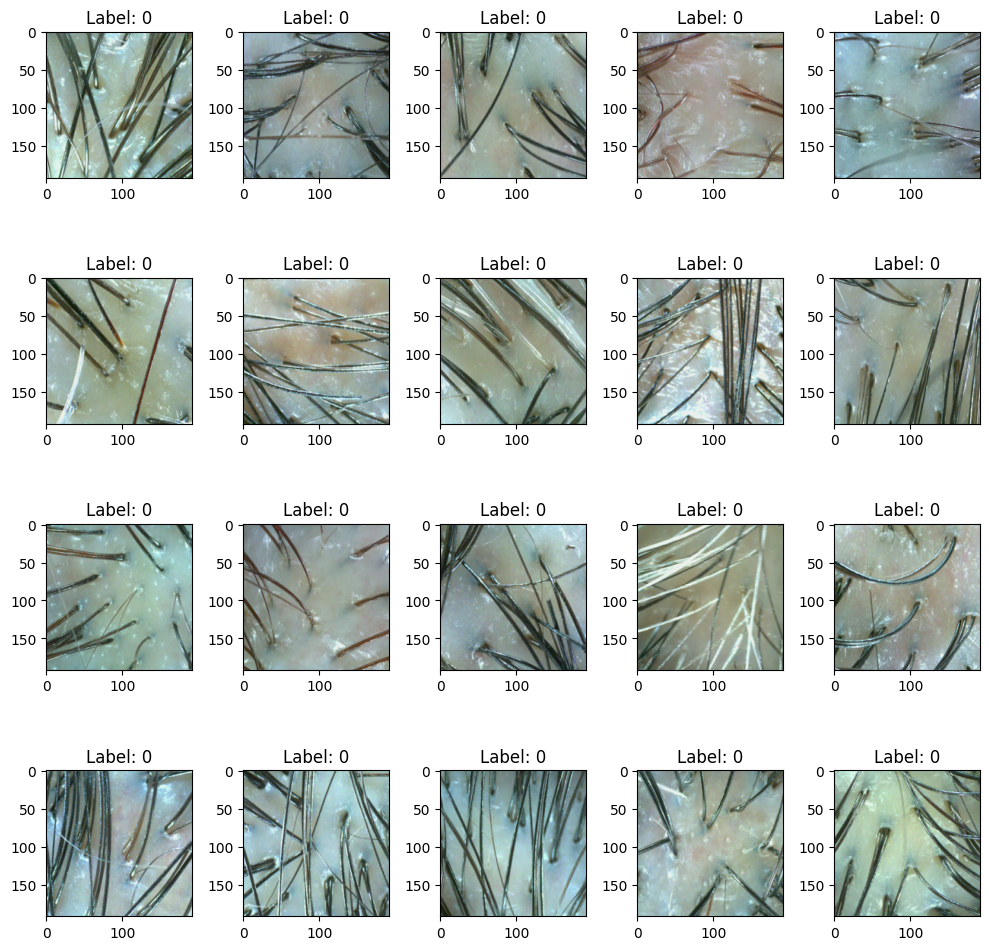

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# npz 파일 로드
data = np.load('after_smote_sebum.npz')

# 이미지 데이터와 라벨 데이터 추출
x = data['x']
y = data['y']

# 라벨 0의 인덱스 추출
label_0_indices = np.where(y == 0)[0]

plt.figure(figsize=(10,10))

# 라벨 0의 이미지 샘플을 시각화
for i in range(20):
    plt.subplot(4, 5, i+1)
    index = label_0_indices[i]
    image = x[index]
    label = y[index]

    plt.imshow(image.astype("uint8"))
    plt.title(f'Label: {label}')
    
plt.tight_layout()    
plt.show()

# **2. 데이터셋 구분 및 실행**

In [9]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental.preprocessing import Normalization

# npz 파일을 불러와 데이터셋 구분
def preprocessing(file, hairClass):
    global shape, x_train, y_train, x_val, y_val, x_test, y_test
    rows = 192                 # 이미지 높이
    cols = 192                 # 이미지 너비
    color = 3                  # 이미지 색공간
    shape = (rows, cols, color)
    hairClass = hairClass      # 출력 데이터 수
    
    # 사진 데이터 읽기
    # 데이터를 읽은 후 해당 파일의 x(이미지)는 x에  y(라벨 0,1,2,3)은 y에 넣는다.
    photo = np.load(file)
    x = photo['x']
    y = photo['y']
    
    # 데이터 1차원에서 3차원 배열로 변환 및 정규화
    x = x.reshape(-1, rows, cols, color)
    x = x.astype('float32') / 255
    
    # 레이블 One-Hot Encoding 변환
    y = to_categorical(y.astype('int32'), hairClass)
    
    # 전체 데이터셋 -> 학습 데이터셋과 테스트 데이터셋으로 구분
    x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                        test_size=0.1, random_state=42)
    
    # 훈련 데이터셋 -> 학습 데이터셋과 검증 데이터셋으로 구분
    # 만약 train_test_split의 test_size속성이 생략되어 있다면 해당 default값은 0.25이다.
    # 만약 train_test_split의 shuffle속성이 생략되어 있다면 해당 default값은 True이다.
    # 즉 데이터셋를 알아서 섞게 된다.
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                      test_size=0.2, random_state=42)
    
    # 데이터셋 확인
    print(x_train.shape, y_train.shape)
    print(x_val.shape, y_val.shape)
    print(x_test.shape, y_test.shape)

# 데이터셋 구분 실행
# preprocessing을 통해 
preprocessing('after_smote_sebum.npz', 4)

(14400, 192, 192, 3) (14400, 4)
(3600, 192, 192, 3) (3600, 4)
(2000, 192, 192, 3) (2000, 4)


# **3. ImageNet: 모델 정의**

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet101, InceptionV3, Xception, EfficientNetB2

from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import regularizers

# trainable 속성을 False로 설정하면 Imagenet 모델의 사전 학습된 가중치를 사용하여 모델의 예측을 생성한다.
# trainable 속성을 True로 설정하면 fine tuning을 수행할 수 있다.

# include_top 속성을 False로 설정하면 기존 Imagenet 모델의 Fully Connected Layer를 제외하고 가져온다.
# include_top 속성을 True로 설정하면 Fully Connected Layer를 포함한 Imagenet 모델을 전부 가져온다.

# VGG16 모델
def def_VGG16(shape, hairClass):
    pre_trained_vgg = VGG16(weights='imagenet', include_top=False, input_shape=shape)

    # 전체 동결 해제
    pre_trained_vgg.trainable = True
    
    # 참조해온 모델 레이어 훈련 여부 확인
    print("VGG16 모델 레이어 체크(전 레이어 동결 해제)")
    for i in pre_trained_vgg.layers[:]:
        print(i.name, i.trainable)
    
    # 학습 범위 설정 10 ~ 끝까지
    end_layer = 9 # setting N (int) 
    print("\n학습 범위: " + str(end_layer+1) + " ~ 끝까지")

    # end_layer까지의 레이어는 다시 동결시킴
    for i in pre_trained_vgg.layers[:end_layer+1]:
        i.trainable = False
    
    # 최종: 레이어 훈련 여부 확인
    print("\nVGG16 모델 레이어 체크(일부 레이어 동결)")
    for i in pre_trained_vgg.layers[:]:
        print(i.name, i.trainable)
  
    model = Sequential()
    model.add(pre_trained_vgg)

    # 레이어 추가(재정의)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(hairClass, activation='softmax'))
  
    # 최종 모델 요약
    print("\n")
    model.summary()

    # 모델 컴파일 
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(learning_rate=0.0001), 
                  metrics=['accuracy'])
  
    return model

# InceptionV3 모델
def def_InceptionV3(shape, hairClass):
  pre_trained_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=shape)
  pre_trained_inceptionv3.trainable = False
  model = Sequential()
  model.add(pre_trained_inceptionv3)

  # 레이어 추가(재정의)
  model.add(GlobalAveragePooling2D())
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(hairClass, activation='softmax'))
     
  # 모델 요약
  model.summary() 

  # 모델 컴파일
  model.compile(loss='categorical_crossentropy',
                     optimizer=Adam(learning_rate=1e-5),
                     metrics=['accuracy'])
  
  return model

# Xception 모델
def def_Xception(shape, hairClass):
  pre_trained_Xception = Xception(weights='imagenet', include_top=False, input_shape=shape)
  pre_trained_Xception.trainable = True
  for i in pre_trained_Xception.layers[:80]:
    i.trainable = False
  model = Sequential()
  model.add(pre_trained_Xception)

  # 레이어 추가(재정의)
  model.add(GlobalAveragePooling2D())
  model.add(Dropout(0.2))
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(hairClass, activation='softmax'))

  # 모델 요약 
  model.summary() 

  # 모델 컴파일
  model.compile(loss='categorical_crossentropy',
                     optimizer=Adam(learning_rate=0.0001),
                     metrics=['accuracy'])
  
  return model

# EfficientNetB2 모델
def def_EfficientNetB2(shape, hairClass):
  pre_trained_EfficientNetB2 = EfficientNetB2(weights='imagenet', include_top=False, input_shape=shape)
  pre_trained_EfficientNetB2.trainable = False
  model = Sequential()
  model.add(pre_trained_EfficientNetB2)

  # 레이어 추가(재정의)
  model.add(GlobalAveragePooling2D())
  model.add(Dropout(0.3))
  model.add(Dense(hairClass, activation='softmax'))

  # 모델 요약 
  model.summary() 

  # 모델 컴파일
  model.compile(loss='categorical_crossentropy',
                     optimizer=Adam(learning_rate=1e-5),
                     metrics=['accuracy'])
  
  return model

### **3-1. 모델 학습, 저장 정의**

In [11]:
import tensorflow as tf
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

def model_train(x_train, y_train, x_val, y_val, modelFunc, modelName):
  # 모델 생성
  # shape는 데이터셋 구분시 초기화된 변수이다. -> (256, 256, 3)
  model = modelFunc(shape, 4)

  # 모델이 저장될 경로 체크
  model_dir = './model'

  if not os.path.exists(model_dir): # 해당 위치에 경로(폴더)가 없으면
    os.mkdir(model_dir) # 변수명 model_dir로 생성시킴

  # 폴더 경로 변경
  os.chdir('C:/jupyter/capston/bald/sebum/model')

  # 콜백 함수 설정
  # ModelCheckpoint란 모델을 저장할 때 사용하는 콜백 함수이다.
  # filepath -> 모델 저장 경로
  # monitor -> 모델 저장 시 기준이 되는 값으로 해당 코드에서는 val_loss을 저장하게 된다
  # verbose -> 1=저장되었다는 코맨트 0=코맨트 없음
  # save_besr_only -> monitor되는 값을 기준으로 가장 좋은 값을 저장한다.
  checkpoint = ModelCheckpoint(f'euclid_sebum_{modelName}.h5', monitor='val_loss', verbose=1, save_best_only=True)

  # EarlyStopping이란 특정 시점에서 훈련을 멈추는 콜백 함수이다.
  # monitor -> 모니터링할 값
  # mode -> 관찰항목에 대해 개선이 없다고 판단하기 위한 기준을 설정한다. 
  # monitor에서 설정한 항목이 val_loss 이면 값이 감소되지 않을 때 종료하여야 하므로 min을 설정한다. 입력하지 않으면 auto로 설정해 알아서 판단해준다.
  # patience -> 20번 이상 변동 없으면 중지시킨다. -> 일단 다 출력해본다.
  early_stopping = EarlyStopping(monitor='val_loss', patience=20)

  # 모델 훈련
  with tf.device("/device:GPU:0"):
    history = model.fit(x_train, y_train,
                        batch_size=16, 
                        epochs=30,
                        verbose=1,
                        validation_data=(x_val, y_val))
        
  
  # 모델 저장
  model.save(f'euclid_sebum_{modelName}.h5')

  return model, history

### **모델 생성 및 훈련**

### VGG16 모델 체크

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet101, InceptionV3, Xception, EfficientNetB2

pre_trained_VGG16 = VGG16(weights='imagenet', include_top=False, input_shape=shape)

pre_trained_VGG16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 192, 192, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 192, 192, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 192, 192, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 96, 96, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 96, 96, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 96, 96, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 48, 48, 128)       0     

### **VGG16 모델 생성 및 훈련**

In [13]:
import os
model_VGG16, history_VGG16 = model_train(x_train, y_train, x_val, y_val, def_VGG16, 'VGG16')

VGG16 모델 레이어 체크(전 레이어 동결 해제)
input_2 True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True

학습 범위: 10 ~ 끝까지

VGG16 모델 레이어 체크(일부 레이어 동결)
input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
________________________________

### **3-2. history 확인**

In [14]:
# 나머지 모델 또한 동일함

print(history_VGG16.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### **4. 그래프 정의**

In [15]:
import matplotlib.pyplot as plt

def model_plot(history, modelName):
  # loss
  y_loss = history.history['loss']
  y_vloss = history.history['val_loss']
  
  x_len = range(1,len(y_loss) + 1)

  fig = plt.figure(figsize=(10, 4))
  ax = fig.add_subplot(1, 2, 1)

  ax.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
  ax.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Loss')
  ax.set_title(modelName + ': train&val loss')
  ax.legend()

  # accuracy
  y_acc = history.history['accuracy']
  y_vacc = history.history['val_accuracy']
  
  x_len = range(1, len(y_acc) + 1)
  ax = fig.add_subplot(1, 2, 2)
  ax.plot(x_len, y_acc, marker='.', c='blue', label='train_set_acc')
  ax.plot(x_len, y_vacc, marker='.', c='red', label='val_set_acc')
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Accuracy')
  ax.set_title(modelName + ': train&val accuracy')
  ax.legend()

  plt.tight_layout()
  plt.show()

### **4-1. 그래프 출력**

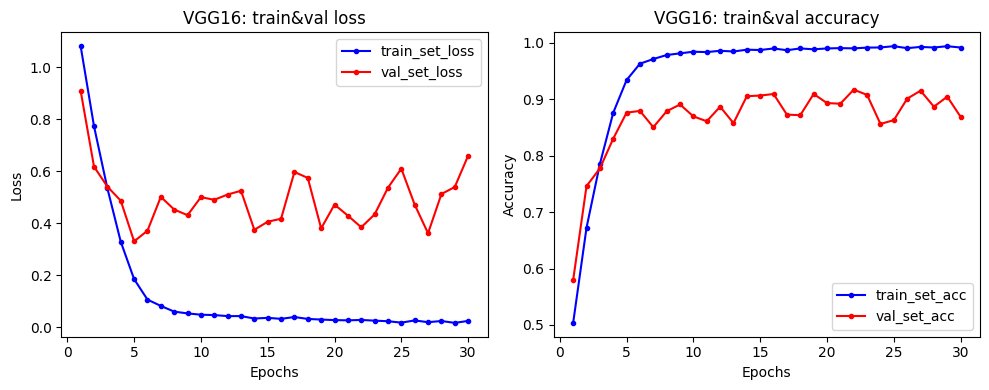

In [16]:
model_plot(history_VGG16, 'VGG16')

### **5. 혼돈행렬 정의**

In [17]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# history와 model을 이용한 방법
def confusionMatrix_model(model, modelName, x_test, y_test):
    # 모델을 이용해 테스트 데이터셋에 대한 예측 수행
    y_pred = model.predict(x_test)

    # softmax 확률 출력을 가장 높은 확률을 가진 클래스로 변환
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Labeling
    label = ['normal', 'mild', 'moderate', 'severe']
    
    # 혼동 행렬 생성
    cm = confusion_matrix(y_true, y_pred_classes)

    # 혼동 행렬 시각화
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(modelName + ' confusionMatrix')
    plt.show()

    # 분류 보고서 출력
    print(classification_report(y_true, y_pred_classes))

    
# 생성된 .h5 파일을 이용하여 생성
def confusionMatrix_h5(model_path, modelName, x_test, y_test):
    
    # 모델 로드
    model = load_model(model_path)

    # 테스트 데이터셋에 대한 예측 수행
    y_pred = model.predict(x_test)

    # 예측 결과를 가장 높은 확률을 가진 클래스로 변환
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # 혼동 행렬 생성
    cm = confusion_matrix(y_true, y_pred_classes)

    # 혼동 행렬 시각화
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(modelName + ' confusionMatrix')
    plt.show()

### **5-1. 혼돈행렬 출력**

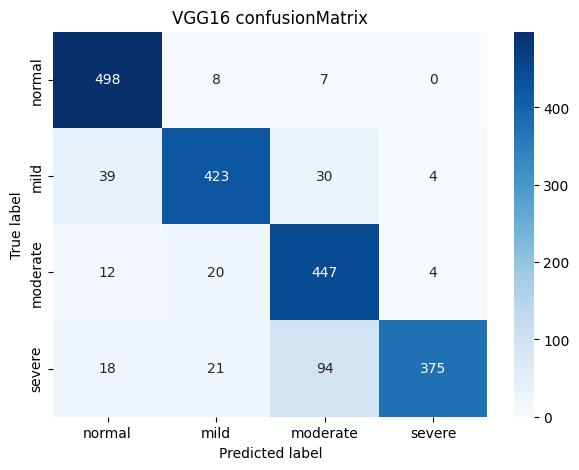

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       513
           1       0.90      0.85      0.87       496
           2       0.77      0.93      0.84       483
           3       0.98      0.74      0.84       508

    accuracy                           0.87      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.88      0.87      0.87      2000



In [18]:
with tf.device("/device:CPU:0"):
    confusionMatrix_model(model_VGG16, 'VGG16', x_test, y_test)

# **6. 모델 evaluate 정의**

In [19]:
def model_evaluate(model, x_test, y_test):
    test_result = model.evaluate(x_test, y_test, verbose=1)
    print("acc: ", test_result[1], 'loss: ', test_result[0])

    return test_result[1], test_result[0]

# **6-1. 모델 evaluate 출력**

In [20]:
with tf.device("/device:CPU:0"):
    accuracy_VGG16, loss_VGG16 = model_evaluate(model_VGG16, x_test, y_test)

63/63 [==============================] - 93s 1s/step - loss: 0.6666 - accuracy: 0.8715
acc:  0.8715000152587891 loss:  0.666551411151886


In [2]:
print("asdf" + "\n" + "asdf")

asdf
asdf
